In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('heat_capacity.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1) 

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [14]:
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train).flatten()

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=0)

In [16]:
y_test_pred_scaled = regressor.predict(X_test_scaled)  
y_train_pred_scaled = regressor.predict(X_train_scaled)

In [17]:
y_test_pred = sc_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

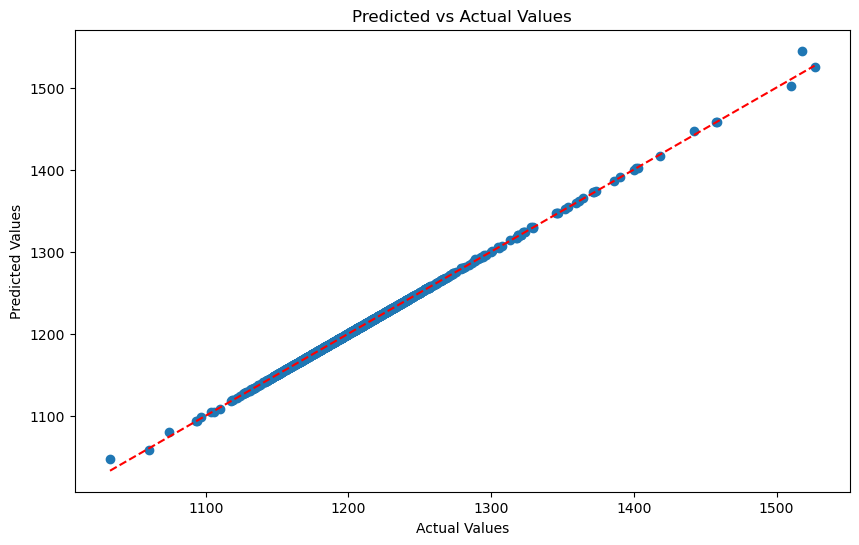

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

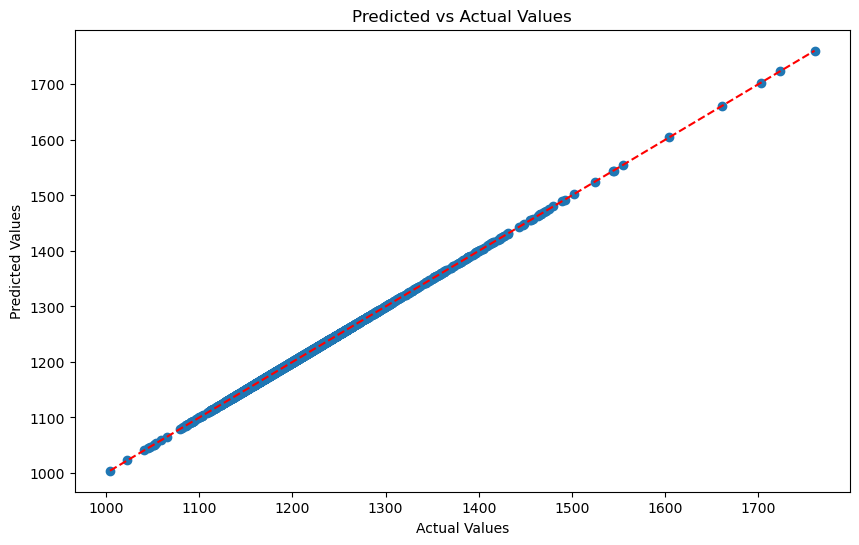

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_test_pred)) / np.array(y_test))) * 100

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape, "%")

Mean Squared Error: 0.5630222023911464
Root Mean Squared Error: 0.7503480541662958
Mean Absolute Error: 0.07838303457172421
R² Score: 0.999612611208407
Mean Absolute Percentage Error: 3.073555488492161 %


In [22]:
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mape = np.mean(np.abs((np.array(y_train) - np.array(y_train_pred)) / np.array(y_train))) * 100

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape, "%")

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R² Score: 1.0
Mean Absolute Percentage Error: 3.1978175733727037 %


In [23]:
X_scaled = sc_X.transform(X)
predictions_scaled = regressor.predict(X_scaled)
predictions = sc_y.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

In [24]:
new_df = pd.DataFrame({'Predictions': predictions})
joined_data = dataset.join(new_df)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1202.579264
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1201.007841
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1188.328577
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1195.359221
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1192.495935


In [25]:
dataset_thermal = pd.read_csv('thermal_conductivity.csv')

In [26]:
N = dataset_thermal.iloc[:, 0]
print(N)

0        6008.0
1        6008.5
2        6009.0
3        6009.5
4        6010.0
         ...   
9685    10890.0
9686    10890.5
9687    10891.0
9688    10891.5
9689    10892.0
Name: MD, Length: 9690, dtype: float64


In [27]:
new = pd.DataFrame({'Depth': N})
joined_data = joined_data.join(new)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions,Depth
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1202.579264,6008.0
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1201.007841,6008.5
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1188.328577,6009.0
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1195.359221,6009.5
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1192.495935,6010.0


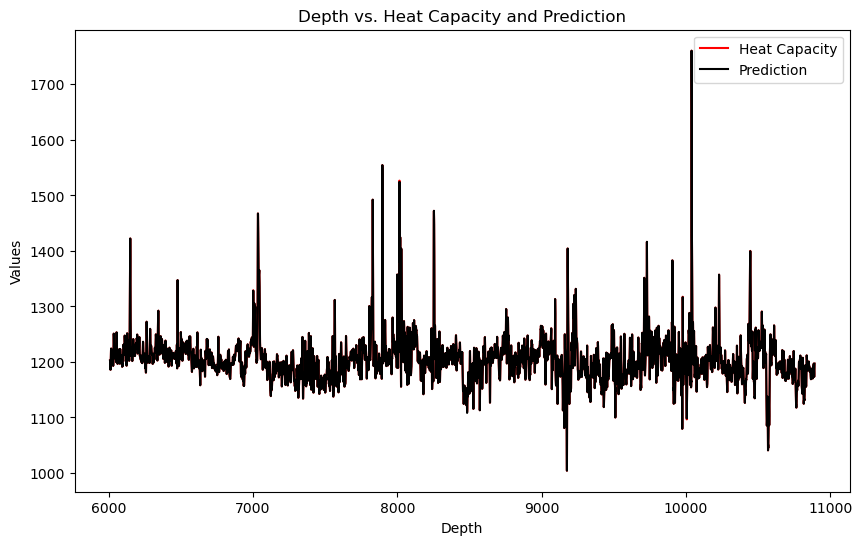

In [28]:
plt.figure(figsize=(10, 6))

# Plotting Heat Capacity vs. Depth
plt.plot(joined_data['Depth'], joined_data['C(capa)'], label='Heat Capacity', color='red')

# Plotting Prediction vs. Depth
plt.plot(joined_data['Depth'], joined_data['Predictions'], label='Prediction', color='black')

# Line of perfect prediction for Heat Capacity (y=x line assuming Prediction ideally matches Heat Capacity)


# Adding labels and legend
plt.xlabel('Depth')
plt.ylabel('Values')
plt.title('Depth vs. Heat Capacity and Prediction')
plt.legend()  # Automatically uses labels from each plot command

# Show the plot
plt.show()